## Instacart Market Basket Analysis
#### Which products will an Instacart consumer purchase again?
The dataset for this competition is a relational set of files describing customers' orders over time. The goal of the competition is to predict which products will be in a user's next order. The dataset is anonymized and contains a sample of over 
* 3 million grocery orders 
* More than 200,000 users 
* For each user, we provide between 4 and 100 of their orders 
* We also provide the week and hour of day the order was placed and a relative measure of time between orders

The only information provided about users is their sequence of orders and the products in those orders
All of the IDs in the dataset are entirely randomized, and cannot be linked back to any other ID
Only products that are bought by multiple people at multiple retailers are included, and no retailer ID is provided

## Dataset

### Aisles (134 rows)
* aisle_id: aisle identifier
* aisle: the name of the aisle

In [1]:
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()

aisles = pd.read_csv("aisles.csv")
print(aisles.shape)
aisles.head()



(134, 2)


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [2]:
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
aisle_id    134 non-null int64
aisle       134 non-null object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


### Departments (21 rows)
* department_id: department identifier
* department: the name of the department

In [3]:
departments = pd.read_csv("departments.csv")
print(departments.shape)
departments.head()

(21, 2)


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [4]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
department_id    21 non-null int64
department       21 non-null object
dtypes: int64(1), object(1)
memory usage: 416.0+ bytes


### Order Prodcts
These files specify which products were purchased in each order.It contains previous order contents for all customers. 'reordered' indicates that the customer has a previous order that contains the product. Note that some orders will have no reordered items. You may predict an explicit 'None' value for orders with no reordered items

* order_id: foreign key
* product_id: foreign key
* add_to_cart_order: order in which each product was added to cart
* reordered: 1 if this product has been ordered by this user in the past, 0 otherwise


where SET is one of the four following evaluation sets (eval_set in orders):

* "prior": orders prior to that users most recent order (~3.2m orders)
* "train": training data supplied to participants (~131k orders)
* "test": test data reserved for machine learning competitions (~75k orders)

In [5]:
order_products_prior = pd.read_csv("order_products__prior.csv")
print(order_products_prior.shape)


orders_products_prior_na = (order_products_prior.isnull().sum() / len(order_products_prior)) * 100
print(orders_products_prior_na)

order_products_prior.head()

(32434489, 4)
order_id             0.0
product_id           0.0
add_to_cart_order    0.0
reordered            0.0
dtype: float64


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [6]:
order_products_prior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtypes: int64(4)
memory usage: 989.8 MB


In [7]:
order_products_train = pd.read_csv("order_products__train.csv")
print(order_products_train.shape)

orders_products_train_na = (order_products_train.isnull().sum() / len(order_products_train)) * 100
print(orders_products_train_na)

order_products_train.head()

(1384617, 4)
order_id             0.0
product_id           0.0
add_to_cart_order    0.0
reordered            0.0
dtype: float64


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


### Orders  (3.4m rows, 206k users)
This file tells to which set (prior, train, test) an order belongs. You are predicting reordered items only for the test set orders. 

* order_id: order identifier
* user_id: customer identifier
* eval_set: which evaluation set this order belongs in (see SET described below)
* order_number: the order sequence number for this user (1 = first, n = nth)
* order_dow: the day of the week the order was placed on
* order_hour_of_day: the hour of the day the order was placed on
* days_since_prior: days since the last order, capped at 30 (with NAs for order_number = 1)

In [8]:
orders = pd.read_csv("orders.csv")
print(orders.shape)

orders_na = (orders.isnull().sum() / len(orders)) * 100
print(orders_na)

orders.head()

(3421083, 7)
order_id                  0.000000
user_id                   0.000000
eval_set                  0.000000
order_number              0.000000
order_dow                 0.000000
order_hour_of_day         0.000000
days_since_prior_order    6.027594
dtype: float64


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
order_id                  int64
user_id                   int64
eval_set                  object
order_number              int64
order_dow                 int64
order_hour_of_day         int64
days_since_prior_order    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


### Products (50k rows)

* product_id: product identifier
* product_name: name of the product
* aisle_id: foreign key
* department_id: foreign key

In [10]:
products = pd.read_csv("products.csv")
print(products.shape)

products_na = (products.isnull().sum() / len(products)) * 100
print(products_na)

products.head()

(49688, 4)
product_id       0.0
product_name     0.0
aisle_id         0.0
department_id    0.0
dtype: float64


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [11]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
product_id       49688 non-null int64
product_name     49688 non-null object
aisle_id         49688 non-null int64
department_id    49688 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


## Exploratory Analysis
We will use order_products_prior as train data set because has more information

In [13]:
# Check missing data

prior = order_products_prior.isnull().sum().sort_values(ascending=False)
percent = (order_products_prior.isnull().sum()/order_products_prior.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([prior, percent], axis=1, keys=['Total Missing', 'Percent'])
missing_data

,Total Missing,Percent
reordered,0,0.0
add_to_cart_order,0,0.0
product_id,0,0.0
order_id,0,0.0


In [9]:
# Check the number of unique orders, unique productsand users
orders_Unique = len(set(order_products_prior.order_id))
products_Unique = len(set(order_products_prior.product_id))
print("There are %s orders for %s products" %(orders_Unique, products_Unique))

There are 3214874 orders for 49677 products


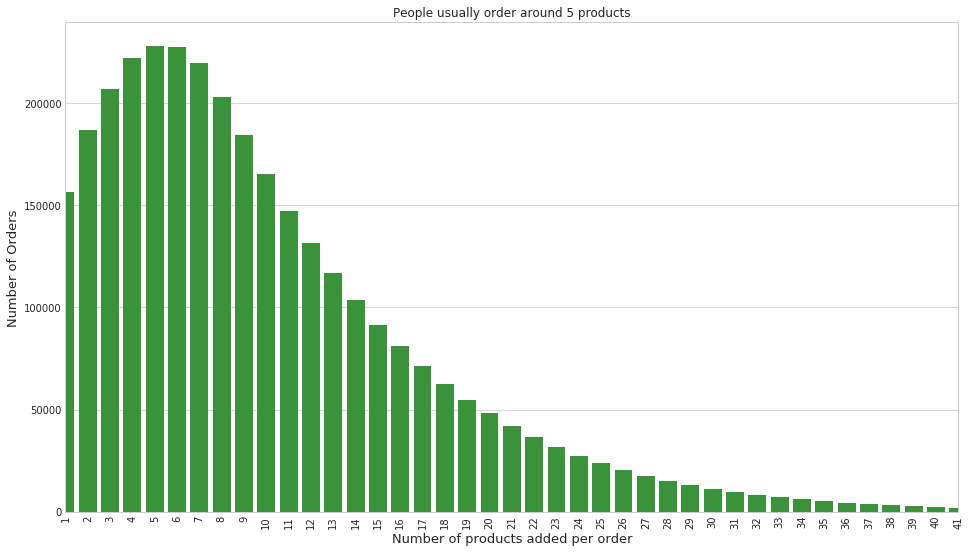

In [62]:
# Number of products that people usually order 

import matplotlib.ticker as ticker
grouped = order_products_prior.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
grouped = grouped.add_to_cart_order.value_counts()


f, ax = plt.subplots(figsize=(16, 9))
plt.xticks(rotation='vertical')
sns.barplot(grouped.index, grouped.values, color=color[2])
plt.xlim(0,40)
plt.ylabel('Number of Orders', fontsize=13)
plt.xlabel('Number of products added per order', fontsize=13)
plt.title('People usually order around 5 products')
plt.show()

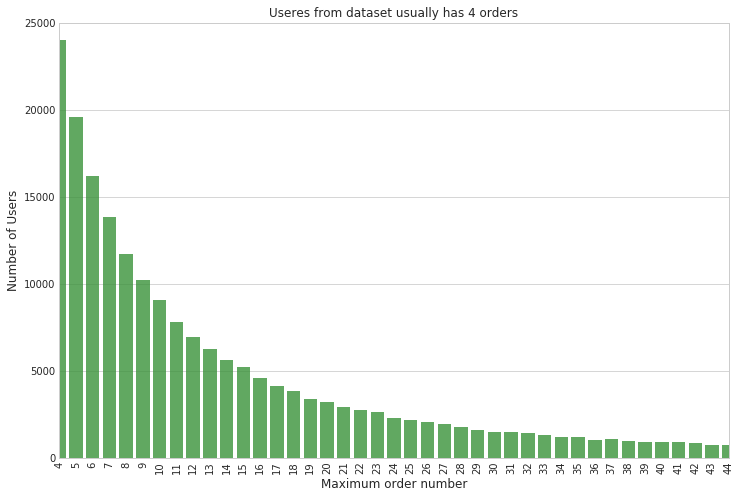

In [45]:
# Number or orders
cnt_srs = orders.groupby("user_id")["order_number"].aggregate(np.max).reset_index()
cnt_srs = cnt_srs.order_number.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[2])
plt.xlim(0,40)
plt.ylim(0,25000)
plt.ylabel('Number of Users', fontsize=12)
plt.xlabel('Maximum order number', fontsize=12)
plt.title('Useres from dataset usually has 4 orders')
plt.xticks(rotation='vertical')
plt.show()

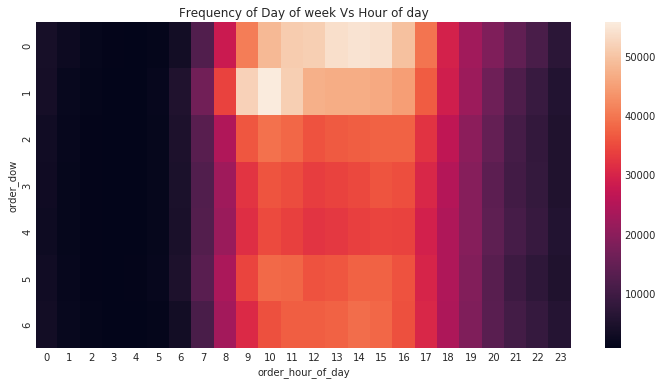

In [46]:
grouped_df = orders.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'order_number')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()

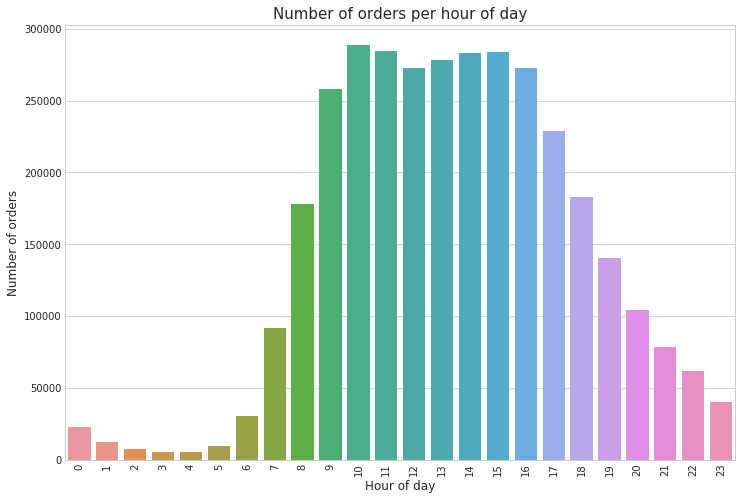

In [63]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_hour_of_day", data=orders)
plt.ylabel('Number of orders', fontsize=12)
plt.xlabel("Hour of day", fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Number of orders per hour of day", fontsize=15)
plt.show()

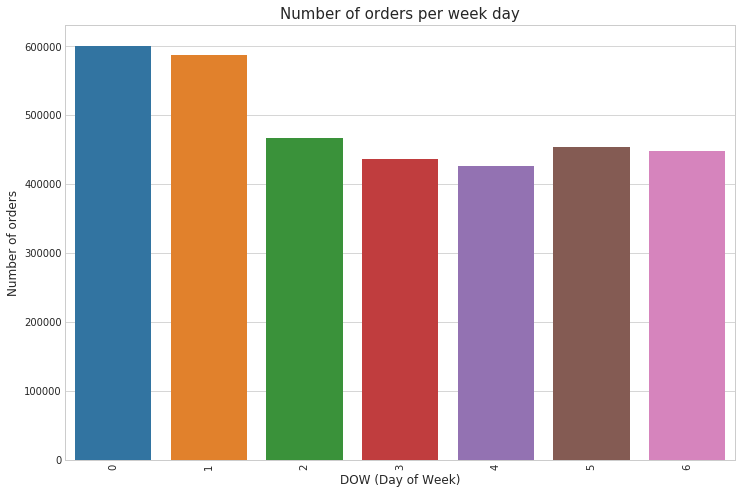

In [60]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_dow", data=orders)
plt.ylabel('Number of orders', fontsize=12)
plt.xlabel("DOW (Day of Week)", fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Number of orders per week day", fontsize=15)
plt.show()

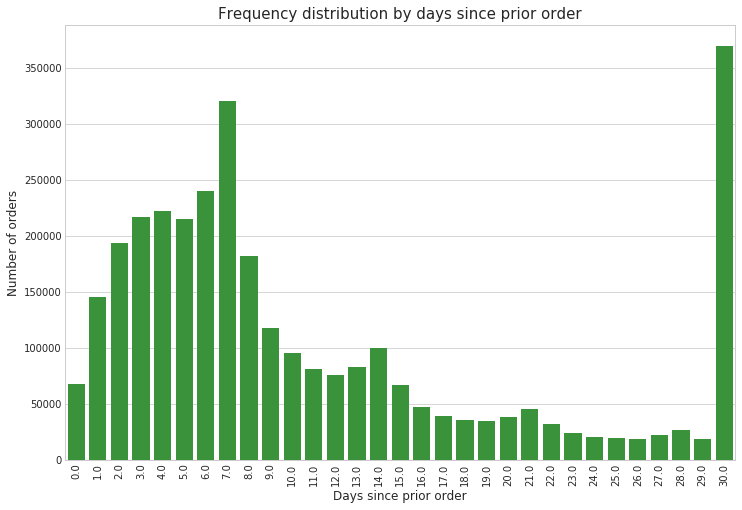

In [66]:
plt.figure(figsize=(12,8))
sns.countplot(x="days_since_prior_order", data=orders, color=color[2])
plt.ylabel('Number of orders', fontsize=12)
plt.xlabel("Days since prior order", fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency distribution by days since prior order", fontsize=15)
plt.show()

In [14]:
# percentage of re-orders in prior set #
reorder_products=order_products_prior.reordered.sum() / order_products_prior.shape[0]

print('Percentage of reordered products', reorder_products )

grouped_df = order_products_prior.groupby("order_id")["reordered"].aggregate("sum").reset_index()
grouped_df["reordered"].ix[grouped_df["reordered"]>1] = 1
reorder_products_order=grouped_df.reordered.value_counts() / grouped_df.shape[0]

print('Percentage of the orders in prior set has no re-ordered items',reorder_products_order[0] )

Percentage of reordered products 0.5896974667922161
Percentage of the orders in prior set has no re-ordered items 0.12084859313304347


/home/grecia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


In [ ]:
order_products_big = pd.merge(order_products_prior, products, on='product_id', how='left')
order_products_big = pd.merge(order_products_big, aisles, on='aisle_id', how='left')
order_products_big = pd.merge(order_products_big, departments, on='department_id', how='left')
order_products_big = pd.merge(order_products_big, orders, on='order_id', how='left')
order_products_big.head()

In [12]:
order_products_big = pd.merge(order_products_prior, products, on='product_id', how='left')

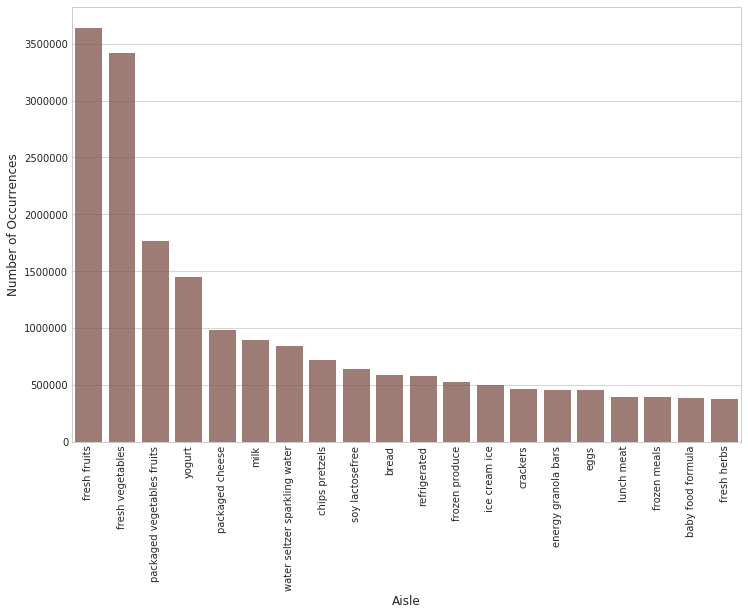

In [16]:
cnt_srs = order_products_big['aisle'].value_counts().head(20)
plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[5])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Aisle', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

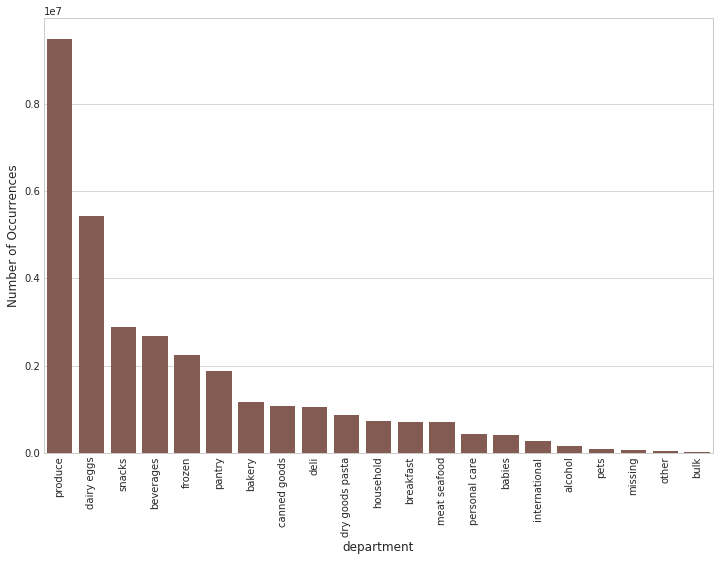

In [70]:
cnt_srs = order_products_big['department'].value_counts()
plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, color=color[5])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('department', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
cnt_srs = order_products_big['product_name'].value_counts()
plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, color=color[5])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('product', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [108]:
#Most popular pruducts
grouped = order_products_prior["product_id"].value_counts()
grouped.head()

24852    472565
13176    379450
21137    264683
21903    241921
47209    213584
Name: product_id, dtype: int64

In [115]:
products[products['product_id']==47209]

,product_id,product_name,aisle_id,department_id
47208,47209,Organic Hass Avocado,24,4


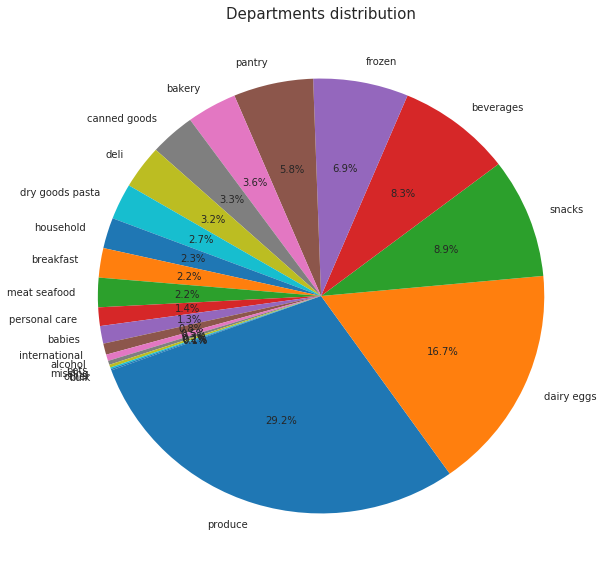

In [17]:
plt.figure(figsize=(10,10))
temp_series = order_products_big['department'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=200)
plt.title("Departments distribution", fontsize=15)
plt.show()

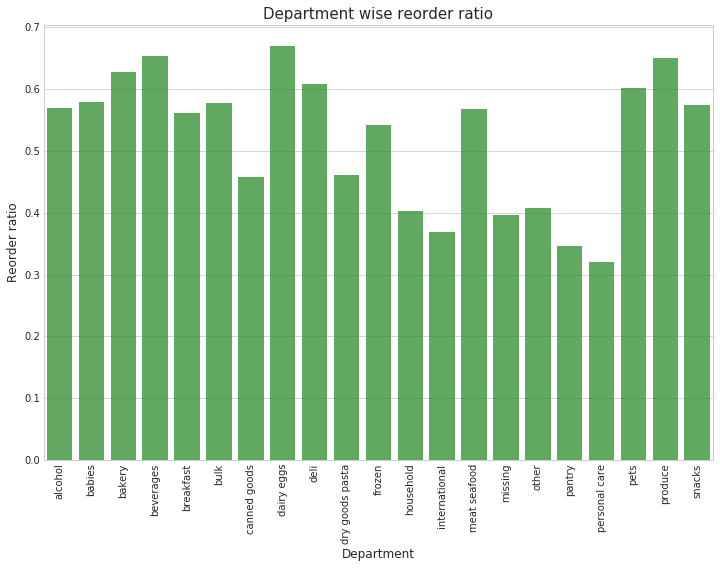

In [74]:
grouped_df = order_products_big.groupby(["department"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.barplot(grouped_df['department'].values, grouped_df['reordered'].values, alpha=0.8, color=color[2])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.title("Department wise reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

/home/grecia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  
/home/grecia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


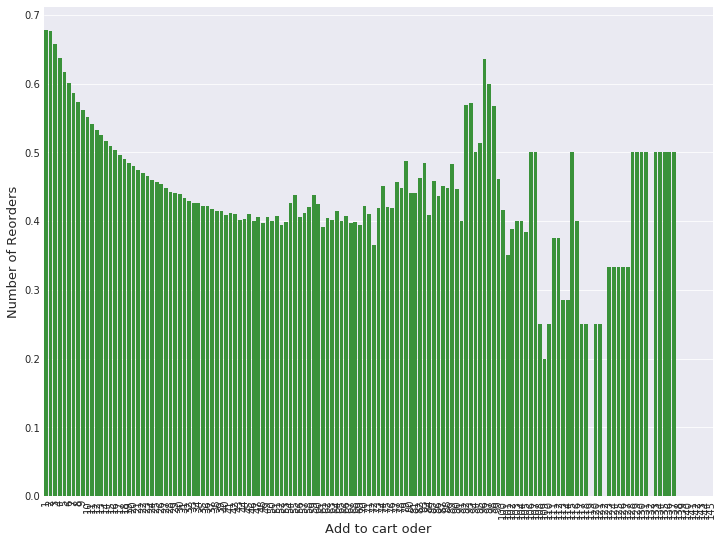

In [40]:
# Check how the order of product add to the cart affect the reorder ratio
grouped_sum= order_products_prior.groupby("add_to_cart_order")["reordered"].aggregate({'Total_orders': 'sum'}).reset_index()
grouped_count = order_products_prior.groupby("add_to_cart_order")["reordered"].aggregate({'Total_reorders': 'count'}).reset_index()
grouped_count['prob']=grouped_sum.Total_orders/grouped_count.Total_reorders


sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(12, 9))
plt.xticks(rotation='vertical')
sns.barplot(grouped_count.add_to_cart_order, grouped_count.prob, color=color[2])
plt.ylabel('Number of Reorders', fontsize=13)
plt.xlabel('Add to cart oder', fontsize=13)
plt.show()



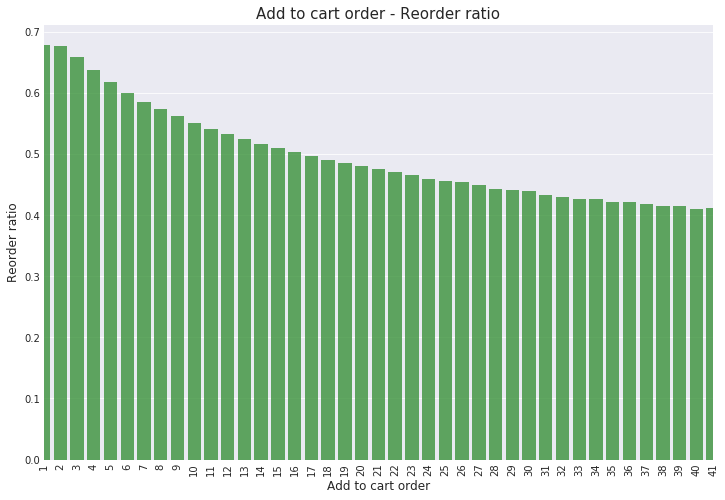

In [85]:
plt.figure(figsize=(12,8))
sns.barplot(grouped_df['add_to_cart_order_mod'].values, grouped_df['reordered'].values, alpha=0.8, color=color[2])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Add to cart order', fontsize=12)
plt.xlim(0,40)
plt.title("Add to cart order - Reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

/home/grecia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


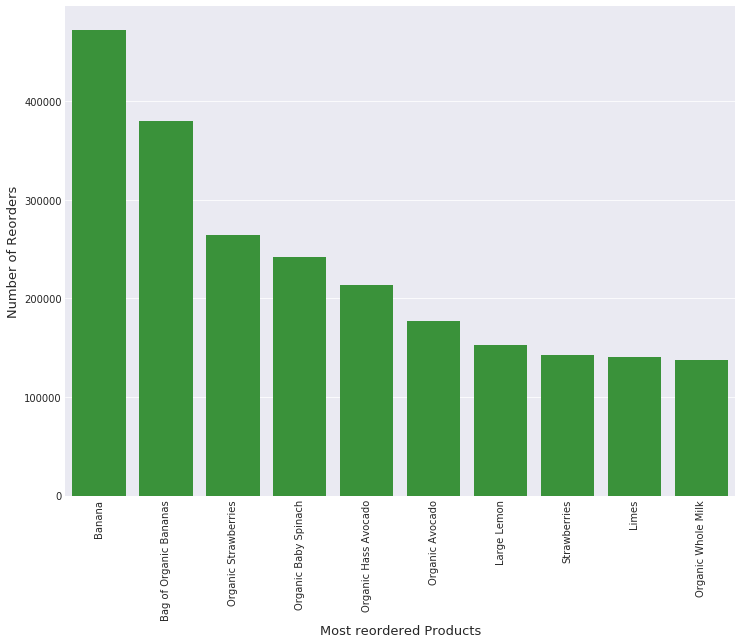

In [83]:
# Most reordered products
grouped = order_products_prior.groupby("product_id")["reordered"].aggregate({'Total_reorders': 'count'}).reset_index()
grouped = pd.merge(grouped, products[['product_id', 'product_name']], how='left', on=['product_id'])
grouped = grouped.sort_values(by='Total_reorders', ascending=False)[:10]
grouped  = grouped.groupby(['product_name']).sum()['Total_reorders'].sort_values(ascending=False)

sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(12, 9))
plt.xticks(rotation='vertical')
sns.barplot(grouped.index, grouped.values, color=color[2])
plt.ylabel('Number of Reorders', fontsize=13)
plt.xlabel('Most reordered Products', fontsize=13)
plt.show()


Text(0.5,0,'Product Name')

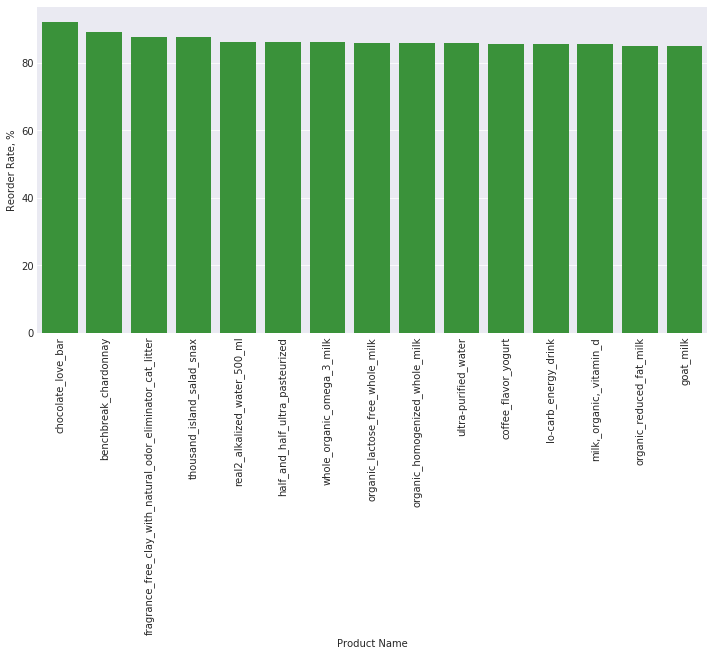

In [84]:
order_limit = 100
top = 15

goods = pd.merge(left=pd.merge(left=products, right=departments, how='left'), right=aisles, how='left')
# to retain '-' and make product names more "standard"
goods.product_name = goods.product_name.str.replace(' ', '_').str.lower() 

mo_products = order_products_prior.groupby('product_id')[['reordered', 'order_id']]\
.aggregate({'reordered': sum, 'order_id': len}).reset_index()
mo_products.columns = ['product_id', 'reordered', 'order_cnt']

mo_products['reorder_rate'] = mo_products['reordered'] / mo_products['order_cnt']
mo_products = mo_products[mo_products.order_cnt > order_limit].sort_values(['reorder_rate'], 
                                                                           ascending=False)[:top]

mo_products = pd.merge(
    left=mo_products,
    right=goods,
    on='product_id')
mo_products

# plot it
plt.figure(figsize=(12, 6))
plt.xticks(rotation='vertical')
sns.barplot(mo_products.product_name, mo_products.reorder_rate*100, color=color[2])
plt.ylabel('Reorder Rate, %')
plt.xlabel('Product Name')

In [117]:
order_products_big.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,add_to_cart_order_mod
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,1
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,2
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,3
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,4
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,5


In [116]:
por = order_products_big.dropna(axis=0, subset=['days_since_prior_order'])\
.groupby('days_since_prior_order')['reordered'].aggregate("mean").reset_index()

print('We can see that longer lags leads to lowered probability (new items),\
\nwhile same day orders tends to have more overlapped product list')

plt.figure(figsize=(12, 6))
sns.barplot(por.days_since_prior_order, por.reordered*100, color=color[2])
plt.xticks(rotation='vertical')
plt.ylabel('Probability of Reorder, %')
plt.xlabel('Days Passed Since Last Order')
pass

KeyError: ['days_since_prior_order']